# **Simulacion**
## Facilitador: José Gabriel Rodríguez Rivas
## Alumna: Lluvia A. Saenz S.
---

**Distribución Binomial**

Un distribuidor de artículos electrónicos recibe varios pedidos
diarios. Cada día, el distribuidor tiene una probabilidad de éxito de cumplir
un pedido (es decir, de tener en stock los artículos solicitados) del 70%.
Desea simular la cantidad de pedidos diarios que logra satisfacer para
gestionar adecuadamente sus inventarios y minimizar las faltantes de
stock.

* **Objetivo:** Generar una variable aleatoria que simule el número de pedidos
satisfechos por día durante una semana, considerando que cada día el
distribuidor recibe 20 pedidos.
---


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

In [3]:
n = 20   # Número de pedidos diarios
p = 0.70 # % de éxito en cumplir un pedido

num_simulaciones = 7  # Número de simulaciones (días en una semana)
U = np.random.uniform(0, 1, num_simulaciones) # Generar un número aleatorio Uniform(0, 1)

# Función de distribución acumulada de la distribución binomial
def binomial_pmf(n, k, p):
    return comb(n, k) * (p**k) * ((1 - p)**(n - k))

def binomial_inverse_transform(n, p, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += binomial_pmf(n, k, p)  # Sumamos la probabilidad hasta que F(k) >= U
        if U <= F_k:
            return k  # k es el número de pedidos cumplidos
        k += 1

# Generar la cantidad de pedidos cumplidos en cada simulación (día)
pedidos_cumplidos = [binomial_inverse_transform(n, p, u) for u in U]

Pedidos cumplidos en cada día de la simulación:
[14, 18, 12, 13, 12, 13, 13]


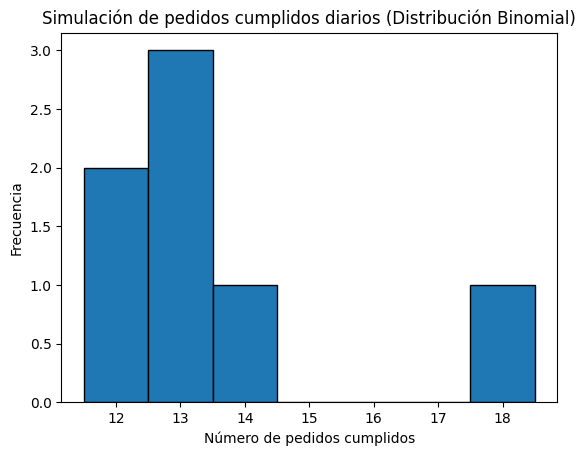

In [5]:
print("Pedidos cumplidos en cada día de la simulación:")
print(pedidos_cumplidos)

plt.hist(pedidos_cumplidos, bins=np.arange(min(pedidos_cumplidos), max(pedidos_cumplidos) + 2) - 0.5, edgecolor='black')
plt.title("Pedidos cumplidos diarios")
plt.xlabel("Número de pedidos cumplidos")
plt.ylabel("Frecuencia")
plt.show()

**Nuemeros pedidos cumplidos:** Dado que se realizan 20 intentos diarios, el valor de pedidos cumplidos varía en cada simulación y oscila entre 10 y 20 pedidos cumplidos.

**Frecuencia:** Ocurrencia de cada valor de pedidos cumplidos, es decir, cuántas veces cada cantidad de pedidos fue cumplida a lo largo de los 7 días simulados.

## **CONCLUSION**
 La mayoría de los valores de pedidos cumplidos se agrupan en torno a un valor central, que en este caso se encuentra alrededor de 14-16 pedidos. Esto es coherente con la probabilidad de éxito del 70%, ya que el distribuidor debería cumplir alrededor de 14 pedidos en promedio (0.7 * 20).

Aunque la mayoría de los días presentan un número de pedidos cumplidos cercano al valor central, existen algunos días en los que el número de pedidos cumplidos es un poco mayor o menor. Esto representa la naturaleza aleatoria de la demanda y el cumplimiento de pedidos, y su variabilidad esperada dentro de una distribución binomial.

 Con esta información, el distribuidor puede prevEer que en la mayoría de los días logrará cumplir entre 14 y 16 pedidos. Sin embargo, también es consciente de que podría cumplir menos en algunos días, lo que le permite considerar un margen en sus inventarios para minimizar la probabilidad de faltar productos.